In [1]:
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline

In [2]:
heart = pd.read_csv('data/heart.csv')
heart.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [5]:
heart['target'].value_counts()

1    526
0    499
Name: target, dtype: int64

In [6]:
# 결측치 확인
heart.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [7]:
# 데이터 세트를 2개의 그룹으로 군집화
kmeans = KMeans(n_clusters = 2, init = 'k-means++', max_iter = 300, random_state = 0) 
kmeans.fit(heart)

KMeans(n_clusters=2, random_state=0)

In [8]:
# Labels_속성을 통해 각 데이터 포인트별로 할당된 군집 중심점을 확인
print(kmeans.labels_)

[1 1 1 ... 0 1 1]


In [9]:
# 동일한 데이터로 예측했으므로 labels_와 같은 결과가 나옴
print(kmeans.predict(heart))

[1 1 1 ... 0 1 1]


In [10]:
# DF에 cluster결과 칼럼 추가
heart['cluster'] = kmeans.labels_

In [11]:
heart.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,cluster
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0,1
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0,1
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0,1
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0,1
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0,0


In [13]:
# target과 cluster값 갯수 비교

heart_res = heart.groupby(['target','cluster'])['fbs'].count()

print(heart_res)

target  cluster
0       0          216
        1          283
1       0          154
        1          372
Name: fbs, dtype: int64


In [14]:
from sklearn.decomposition import PCA

pca = PCA(n_components = 3)
pca_transformed = pca.fit_transform(heart)

In [15]:
pca_transformed

array([[-34.61636657, -18.62082976,  -2.95964998],
       [-42.62623885,  -4.1528688 ,  11.00472001],
       [-70.20185655,  29.37274646,  16.30680736],
       ...,
       [ 28.001585  ,  26.65354175, -27.15237649],
       [  6.58685814, -12.53454296, -21.19345491],
       [-57.9616529 ,  35.82443063, -12.38834798]])

In [16]:
heart['pca_x']=pca_transformed[:,0] # 첫번째 값(X 좌표)
heart['pca_y']=pca_transformed[:,1] # 첫번째 값(y 좌표)

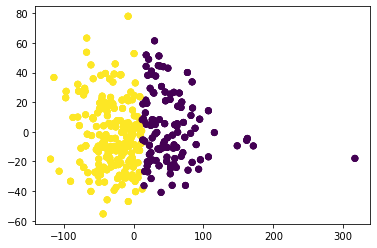

In [17]:
# 산점도로 표현 : 군집별로 다른 색상으로 표시
plt.scatter(x=heart.loc[:,'pca_x'], y = heart.loc[:,'pca_y'], c = heart['cluster'])

- 두 군집이 구분하기 어려움

In [35]:
from sklearn.metrics import silhouette_samples, silhouette_score

In [33]:
heart_data = heart.drop(['target','cluster'], axis =1)
heart_target = heart['target']

In [36]:
# 모든 개별 데이터에 실루엣 계수값을 구함
score_samples = silhouette_samples(heart_data, heart['cluster'])
print('silhouette_samples( ) return 값의 shape' , score_samples.shape)

silhouette_samples( ) return 값의 shape (1025,)


In [37]:
# iris에 실루엣 계수 컬럼 추가
heart['silhouette_coeff'] = score_samples
heart.tail(3)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,cluster,pca_x,pca_y,silhouette_coeff
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0,0,28.001585,26.653542,0.272317
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1,1,6.586858,-12.534543,0.176589
1024,54,1,0,120,188,0,1,113,0,1.4,1,1,3,0,1,-57.961653,35.824431,0.517047


In [38]:
## 모든 데이터의 평균 실루엣 계수
average_score = silhouette_score(heart_data, heart['cluster'])
print('heart 데이터셋 Silhouette Analysis Score:{0:.3f}'.format(average_score))

heart 데이터셋 Silhouette Analysis Score:0.420


In [39]:
# 군집별 평균 실루엣 계수값 확인
heart.groupby('cluster')['silhouette_coeff'].mean()

cluster
0    0.361148
1    0.453648
Name: silhouette_coeff, dtype: float64

**실루엣 계수 결과 굉------장히 안좋은 군집**

In [24]:
from sklearn.datasets import make_blobs

X, y = make_blobs(n_samples = 200, n_features = 3, centers = 2, cluster_std = 0.8, random_state = 0)
print(X.shape)

(200, 3)


In [25]:
# y 타겟값의 분포를 확인
unique, counts = np.unique(y, return_counts = True)
unique, counts

(array([0, 1]), array([100, 100], dtype=int64))

In [27]:
clusterDF = pd.DataFrame(data=X, columns=['ftr1', 'ftr2','ftr3'])
clusterDF['target'] = y
clusterDF.head(3)

,ftr1,ftr2,ftr3,target
0,1.584003,-0.614023,4.091145,1
1,0.734428,3.464945,0.919253,0
2,1.511986,-1.055000,2.626795,1


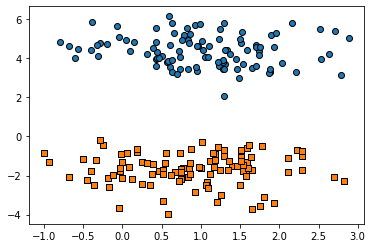

In [28]:
target_list = np.unique(y)
markers = ['o','s','^','P','D','H','x']

for target in target_list :
    target_cluster = clusterDF[clusterDF['target'] == target]
    plt.scatter(x=target_cluster['ftr1'], y=target_cluster['ftr2'], edgecolor='k', marker=markers[target])
    
plt.show()

In [29]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 200, random_state = 0)
cluster_labels = kmeans.fit_predict(X)
clusterDF['kmeans_label'] = cluster_labels
clusterDF.head()

,ftr1,ftr2,ftr3,target,kmeans_label
0,1.584003,-0.614023,4.091145,1,0
1,0.734428,3.464945,0.919253,0,1
2,1.511986,-1.055000,2.626795,1,0
3,1.047008,4.055078,2.133188,0,1
4,2.792074,3.140295,2.091874,0,1


In [30]:
centers = kmeans.cluster_centers_
unique_labels = np.unique(cluster_labels)